In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing libraries
from sklearn.model_selection import train_test_split


#Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix




import os
import warnings
warnings.filterwarnings("ignore")

### Importing Full Training and Testing Dataset

In [43]:
s = os.path.sep
train_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'train_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)
                         
                         
test_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                      'drought_prediction_data' + s + 'test_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)

In [44]:
print(train_df.shape)
train_df.head()

(3014760, 12)


,fips,month_ahead_score,rounded_score,month_ago_score,precip_7d_sum,precip_30d_sum,precip_90d_sum,surface_pressure_30d_avg,specific_humidity_30d_avg,temp_2m_max_7d_avg,temp_2m_max_30d_avg,lat
0,1001,2.0,1.0,1.0,2.29,64.38,275.80,100.18,8.43,24.97,22.56,32.536382
1,1001,2.0,2.0,1.0,1.00,27.21,276.80,100.18,9.29,30.58,25.11,32.536382
2,1001,3.0,2.0,1.0,0.41,11.94,265.19,100.09,9.57,31.34,27.34,32.536382
3,1001,3.0,2.0,1.0,19.35,26.92,278.18,100.13,10.44,32.20,29.34,32.536382
4,1001,3.0,2.0,1.0,15.97,37.05,267.18,100.10,11.68,33.06,31.52,32.536382


In [45]:
print(test_df.shape)
test_df.head()

(261072, 12)


,fips,month_ahead_score,rounded_score,month_ago_score,precip_7d_sum,precip_30d_sum,precip_90d_sum,surface_pressure_30d_avg,specific_humidity_30d_avg,temp_2m_max_7d_avg,temp_2m_max_30d_avg,lat
0,1001,0.0,0.0,1.0,20.13,142.15,349.14,100.08,10.19,25.40,23.92,32.536382
1,1001,0.0,0.0,1.0,23.52,142.34,369.29,99.98,11.09,28.09,25.43,32.536382
2,1001,0.0,0.0,1.0,58.63,159.67,401.54,100.05,11.30,26.00,25.53,32.536382
3,1001,0.0,0.0,0.0,2.14,104.42,345.09,100.06,12.54,29.53,27.23,32.536382
4,1001,0.0,0.0,0.0,0.00,84.29,312.08,100.11,13.58,33.02,29.10,32.536382


### Importing West Coast Training and Testing Dataset

In [46]:
s = os.path.sep
wc_train_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'wc_train_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)
                         
                         
wc_test_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                      'drought_prediction_data' + s + 'wc_test_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)

In [47]:
print(wc_train_df.shape)
wc_train_df.head()

(129010, 12)


,fips,month_ahead_score,rounded_score,month_ago_score,precip_7d_sum,precip_30d_sum,precip_90d_sum,surface_pressure_30d_avg,specific_humidity_30d_avg,temp_2m_max_7d_avg,temp_2m_max_30d_avg,lat
0,6001,0.0,0.0,0.0,0.04,31.75,255.04,99.72,7.05,22.30,20.51,37.648081
1,6001,0.0,0.0,0.0,14.00,45.75,256.07,99.64,7.15,20.51,20.53,37.648081
2,6001,0.0,0.0,0.0,11.40,36.42,169.68,99.68,6.87,18.58,20.21,37.648081
3,6001,0.0,0.0,0.0,0.05,25.49,124.05,99.63,7.42,31.11,23.07,37.648081
4,6001,0.0,0.0,0.0,0.01,25.47,94.32,99.49,7.66,26.48,24.13,37.648081


In [48]:
print(wc_test_df.shape)
wc_test_df.head()

(11172, 12)


,fips,month_ahead_score,rounded_score,month_ago_score,precip_7d_sum,precip_30d_sum,precip_90d_sum,surface_pressure_30d_avg,specific_humidity_30d_avg,temp_2m_max_7d_avg,temp_2m_max_30d_avg,lat
0,6001,0.0,0.0,0.0,0.02,15.07,380.46,99.57,8.12,23.12,20.42,37.648081
1,6001,0.0,0.0,0.0,0.23,4.76,313.32,99.51,7.86,21.16,21.25,37.648081
2,6001,0.0,0.0,0.0,0.09,4.10,235.02,99.39,8.01,21.65,21.90,37.648081
3,6001,0.0,0.0,0.0,67.42,67.76,257.86,99.30,7.83,16.64,20.97,37.648081
4,6001,0.0,0.0,0.0,3.43,71.17,201.64,99.27,7.59,19.94,19.81,37.648081


## Visualizations

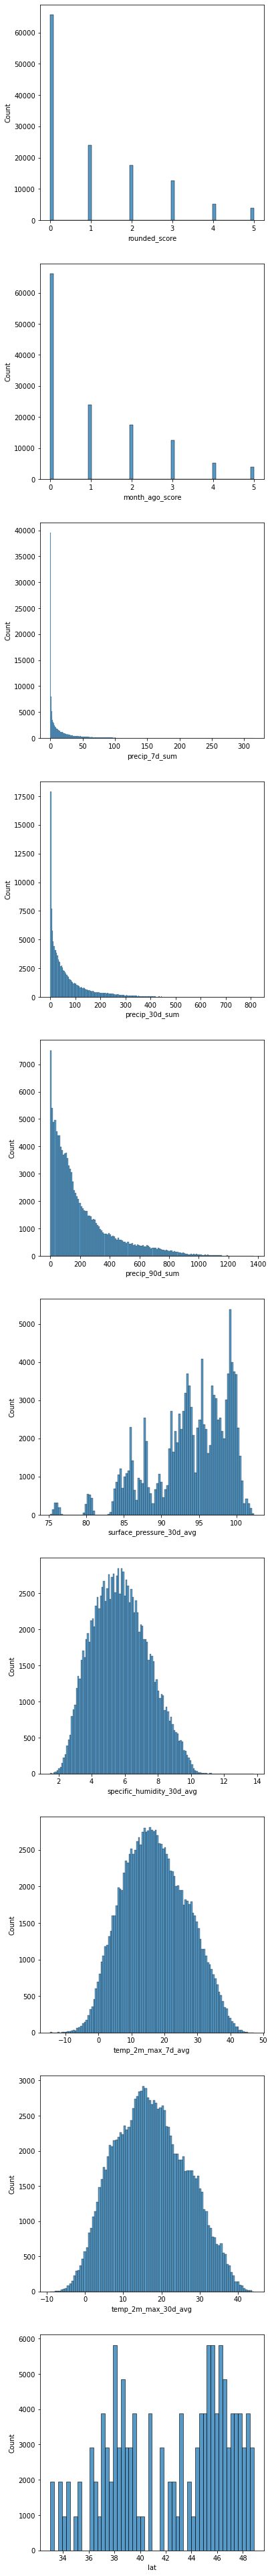

In [100]:
#Creating a list of features from the dataset to iterate through 
features = list(wc_train_df.columns.drop(['month_ahead_score', 'fips']))

#Establishing plots and plot sizes
fig, ax = plt.subplots(nrows=10, figsize=(6, 70))
i = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(wc_train_df, x=col, kde=False, ax = ax[i]) 
    
    i = i + 1


## Train/Test Split

In [105]:
#Seperating the target feature 
X = wc_train_df.drop('month_ahead_score', axis = 1).copy()
y = wc_train_df['month_ahead_score'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [108]:
#List of models to be tested
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), 
         KNeighborsClassifier(), BaggingClassifier()]

#Empty lists to append for analysis
mod = []
precision_score = []
accuracy_score = []
f1_score = []

#Creating a for loop to test all models with generic parameters
for m in models:
    accuracy_score.append(cross_val_score(m, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean())
    mod.append(m)

#Creating the DataFrame for analysis
model_df = pd.DataFrame(columns = ['model','accuracy'])
model_df['model'] = mod
model_df['accuracy'] = accuracy_score
model_df.sort_values(by=['accuracy'], ascending = False).style.background_gradient(subset='accuracy')

,model,accuracy
1,RandomForestClassifier(),0.868285
4,BaggingClassifier(),0.855738
2,GradientBoostingClassifier(),0.816797
3,KNeighborsClassifier(),0.585313
0,LogisticRegression(),0.507248
